## ベイズ因子比較

In [1]:
import numpy as np
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


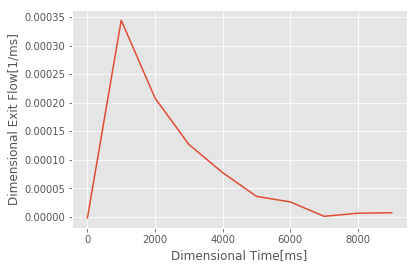

In [2]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [3]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

## Path2

## 交換なし

In [4]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
time_n = 204800
Temp = np.array([1, 2, 5, 10, 20], dtype=float)
beta = 1/Temp
print(beta)
print(beta[-1])
print(beta[::-1])
model = np.array([0, 1])
print(model)

[ 1.    0.5   0.2   0.1   0.05]
0.05
[ 0.05  0.1   0.2   0.5   1.  ]
[0 1]


In [5]:
de0_two_n = ['zero', 'one', 'two', 'three', 'four']
de1_two_n = ['zero', 'one', 'two', 'three', 'four']
ka_two_n = ['zero', 'one', 'two', 'three', 'four']
kd_two_n = ['zero', 'one', 'two', 'three', 'four']
sigma_two_n = ['zero', 'one', 'two', 'three', 'four']
energy_two_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_n = ['zero', 'one', 'two', 'three', 'four']
pick_two_n = ['zero', 'one', 'two', 'three', 'four']
update_two_n = ['zero', 'one', 'two', 'three', 'four']
exchange_two_n = ['zero', 'one', 'two', 'three', 'four']

In [6]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=1-20_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_n[i], de1_two_n[i], ka_two_n[i], kd_two_n[i], sigma_two_n[i], energy_two_n[i], dlogp_two_n[i],\
    pick_two_n[i], update_two_n[i], exchange_two_n[i] = file_output_two(r_file, time_n, np.hstack((Temp, Temp)))

Wall time: 1min 26s


In [10]:
print(dlogp_two_n[4])

[[  4.24463204e+03  -3.34599551e+02   5.35643068e+02 ...,   4.54923299e+01
    4.54923299e+01   4.54923299e+01]
 [  4.24463204e+03  -4.57794233e+01  -4.61179958e+01 ...,   3.72902190e+01
    3.72902190e+01   4.38686515e+01]
 [  4.24463204e+03  -4.77224440e+01  -4.77224440e+01 ...,   6.48449634e-01
    9.77011575e-01  -4.05484970e+00]
 ..., 
 [  3.64225319e+03   3.64225319e+03   3.64225319e+03 ...,   2.12124826e+00
    2.81201196e+00   1.39899299e+00]
 [  3.64225319e+03   3.68142302e+03   3.15691662e+03 ...,  -3.01519160e+01
   -4.59948516e+01  -2.66655405e+01]
 [  3.64225319e+03   4.80765375e+03   4.80765375e+03 ...,  -7.60539059e+01
   -1.37202530e+02  -1.37202530e+02]]


In [11]:
print(update_two_n[4].sum(axis=1)/time_n)
print(exchange_two_n[4])

[ 0.79016602  0.83193848  0.97782715  0.99341309  0.99726074  0.99508301
  0.99175293  0.97036621  0.73037109  0.55290039]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [12]:
print(energy_two_n[4])

[[ 23080.57851245  23080.57851245  23080.57851245 ...,    -96.07279807
     -96.07279807    -96.07279807]
 [ 23080.57851245  23080.57851245  23080.57851245 ...,    -96.50033949
     -96.50033949    -96.50033949]
 [ 23080.57851245  23080.57851245  23080.57851245 ...,    -69.40627313
     -69.40627313    -69.40627313]
 ..., 
 [ 19137.13589473  19137.13589473  19137.13589473 ...,    -79.79494981
     -79.78934359    -79.96129166]
 [ 19137.13589473  19137.13589473  16392.13074746 ...,    -99.27385982
    -100.2249806     -98.57118005]
 [ 19137.13589473  17932.4150857   17932.4150857  ...,   -100.34374489
    -100.18200084   -100.18200084]]


In [13]:
def fig_energy_M0(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start
    element = 5

    energy_m = np.zeros(element, dtype=float)
    energy_s = np.zeros(element, dtype=float)

    for i in range(element):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = energy[j][i][start:end].mean()
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_title('$M=0$')
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$<Eenrgy>$')

    fn = write_file_pass + filename
#     plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

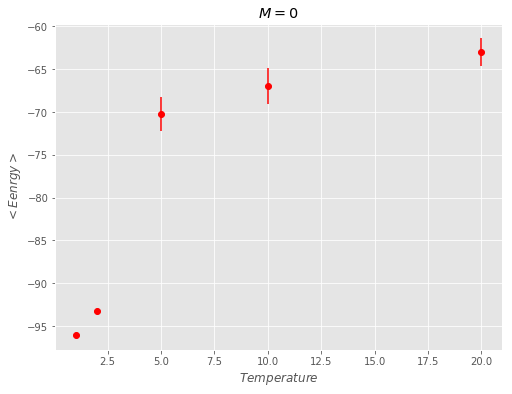

In [53]:
energy_twoM0_m_n, energy_twoM0_s_n = fig_energy_M0(51200, energy_two_n, 'Energy-Temperature_figure_M=0_koukannashi_Temp=1-20_deltaT=51200-102400.png')

In [52]:
def fig_energy_M1(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start
    element = 5

    energy_m = np.zeros(element, dtype=float)
    energy_s = np.zeros(element, dtype=float)

    for i in range(element):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = energy[j][9-i][start:end].mean()##ここでiを変える
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_title('$M=1$')
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$<Eenrgy>$')

    fn = write_file_pass + filename
#     plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

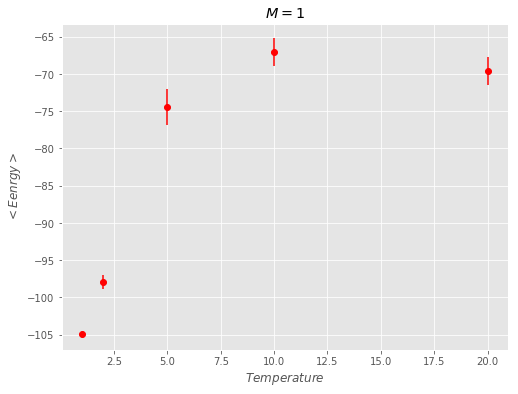

In [54]:
energy_twoM1_m_n, energy_twoM1_s_n = fig_energy_M1(51200, energy_two_n, 'Energy-Temperature_figure_M=1_koukannashi_Temp=1-20_deltaT=51200-102400.png')

In [18]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start

    dlogp_m = np.zeros(2, dtype=float)
    dlogp_s = np.zeros(2, dtype=float)

    for i in range(2):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][4+i][start:end].mean()##ここ注意(iについて)
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(np.array([0, 1]), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_title('$Temperature=20$')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    fn = write_file_pass + filename
#    plt.savefig(fn)

    plt.show()
    
    return dlogp_m, dlogp_s

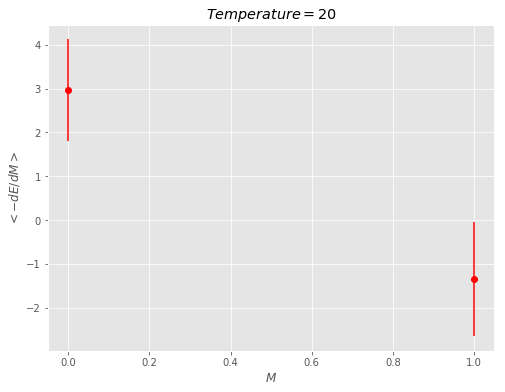

In [55]:
dlogp_two_m_n, dlogp_two_s_n = fig_dE(51200, dlogp_two_n, 'dEnergy-M_figure_Temp=20_koukannashi_deltaT=51200-102400.png')

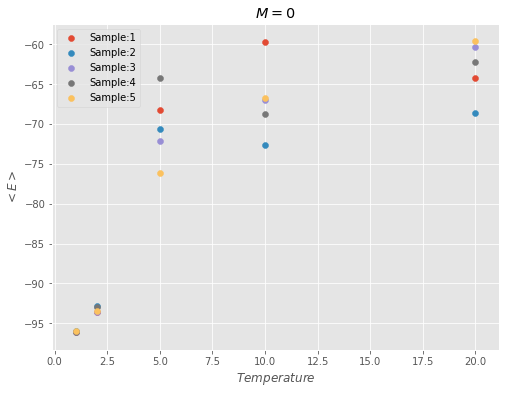

In [56]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
E_M0_n = np.zeros([5, 5])
E_M1_n = np.zeros([5, 5])
dE_n = np.zeros([5, 2])

write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

start = 51200
end = 2*start

for i in range(5):
    for j in range(5):
        E_M0_n[i, j] = energy_two_n[i][j, start:end].mean()
        E_M1_n[i, j] = energy_two_n[i][9-j, start:end].mean()
    dE_n[i, 0] = dlogp_two_n[i][4, start:end].mean()
    dE_n[i, 1] = dlogp_two_n[i][5, start:end].mean()
    
    ax.scatter(Temp, E_M0_n[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig(write_file_pass+'Energy-Temperature_EverySample_figure_M=0_koukannashi_Temp=1-20_deltaT=51200-102400.png')

plt.show()

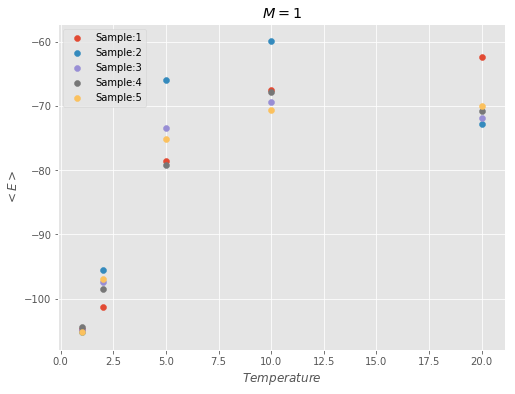

In [57]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(5):    
    ax.scatter(Temp, E_M1_n[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig(read_file_pass+'Energy-Temperature_EverySample_figure_M=1_koukannashi_Temp=1-20_deltaT=51200-102400.png')

plt.show()

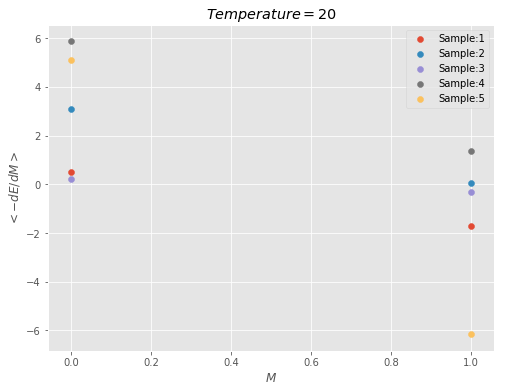

In [58]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(5):    
    ax.scatter(np.array([0]), dE_n[i, 0], color=cycle[i], label='Sample:{}'.format(i+1))
    ax.scatter(np.array([1]), dE_n[i, 1], color=cycle[i])

ax.set_title('$Temperature=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig(write_file_pass+'dEnergy-M_EverySample_figure_Temp=20_koukannashi_Temp=1-20_deltaT=51200-102400.png')

plt.show()

In [59]:
N = 10
y_M0 = np.zeros([N, 5])
y_M1 = np.zeros([N, 5])
y_TN = np.zeros([N, 2])
S_M0 = np.zeros(N)
S_M1 = np.zeros(N)
S_TN = np.zeros(N)
for i in range(N):
    x_M0 = np.random.randint(0, 5, 5)
    x_M1 = np.random.randint(0, 5, 5)
    x_TN = np.random.randint(0, 5, 2)
    for j in range(5):
        y_M0[i, j] = E_M0_n[x_M0[j], j]
        y_M1[i, j] = E_M1_n[x_M1[j], j]
    S_M0[i] = integrate.simps(y_M0[i]*((-1/Temp)**2), Temp)
    S_M1[i] = integrate.simps(y_M1[i]*((-1/Temp)**2), Temp)
#    S_M0[i] = integrate.simps(y_M0[i], beta)
#    S_M1[i] = integrate.simps(y_M1[i], beta)
    for j in range(2):
        y_TN[i, j] = dE_n[x_TN[j], j]
    S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
#print(y_TN)
print(S_M0)
print(S_M1)
print(S_TN)

[-29.1513472  -30.14665593 -30.16124657 -30.75863231 -30.26653669
 -30.67061977 -29.66187069 -28.71754916 -30.00585859 -29.48575481]
[-32.27459079 -26.55671696 -28.24950276 -27.24968032 -29.29960342
 -28.3010543  -29.69114054 -28.50006387 -30.60614683 -27.15960339]
[-1.52353132  2.7853824   1.69928506  1.57448336  2.57084099 -0.60210497
  2.97207927  2.7853824   2.10052335 -0.05802607]


In [60]:
BF_path2_n = S_M1-S_M0+beta[-1]*S_TN
print(BF_path2_n)

[-3.19942016  3.72920809  1.99670806  3.58767616  1.09547532  2.33946022
  0.11933412  0.3567544  -0.49526207  2.32325011]


In [61]:
bar_BF_n = BF_path2_n.mean()
sig_BF_n = 0.
print(BF_path2_n.shape[0])
for i in range(N):
    sig_BF_n += (BF_path2_n[i]-bar_BF_n)**2
sig_BF_n /= (BF_path2_n.shape[0]-1)
sig_BF_n = np.sqrt(sig_BF_n)
sig_BF_n /= np.sqrt(BF_path2_n.shape[0])
print(bar_BF_n, sig_BF_n)
print(bar_BF_n-sig_BF_n, bar_BF_n+sig_BF_n)

10
1.18531842593 0.661724835064
0.523593590863 1.84704326099


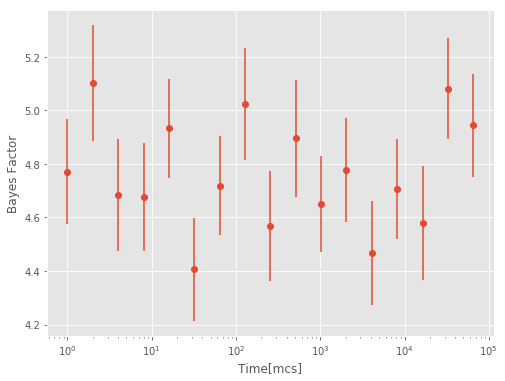

In [75]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 1
start = t_0
end = 2*start
beta = 1/np.array([1, 2, 5, 10, 20])

while start<102400:
    
    N = 50
    
    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0_n[x_M0[j], j]
            y_M1[i, j] = E_M1_n[x_M1[j], j]
#        print(y_M0.shape[1]); print(beta.shape[0])
        S_M0[i] = integrate.simps(y_M0[i], beta)
        S_M1[i] = integrate.simps(y_M1[i], beta)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE_n[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2_n = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF_n = BF_path2_n.mean()
    sig_BF_n = 0.

    for i in range(N):
        sig_BF_n += (BF_path2_n[i]-bar_BF_n)**2
    sig_BF_n /= (BF_path2_n.shape[0]-1)
    sig_BF_n = np.sqrt(sig_BF_n)
    sig_BF_n /= np.sqrt(BF_path2_n.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF_n, sig_BF_n, fmt='o', color=cycle[0])
    else:
        ax.errorbar(start, bar_BF_n, sig_BF_n, fmt='o', color=cycle[0])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
#plt.legend()
#ax.set_ylim(-0.5, .5)

fn = write_file_pass + 'BayesFactor-Time_koukannashi_Temp=1-20_deltaT=51200-102400.png'
#plt.savefig(fn)

plt.show()

## 交換あり

In [7]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

In [8]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=1-20_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp_two[i],\
    pick_two[i], update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

Wall time: 49.1 s


In [20]:
# print(update_two[0].sum(axis=1)/time)
# print(exchange_two[4])
ar = np.zeros(10)
ex = np.zeros(9)
for i in range(5):
    ar += update_two[i].sum(axis=1)/time
    ex += exchange_two[i]/time

#print(ar)
print(ar/5)
print(ex/5)

[ 0.79082813  0.84006445  0.98801367  0.9946582   0.99654297  0.99645898
  0.99306641  0.97274805  0.70968945  0.53559375]
[ 0.48994727  0.0535293   0.72793359  0.84375977  0.40049805  0.81961719
  0.62576562  0.0502793   0.25954688]


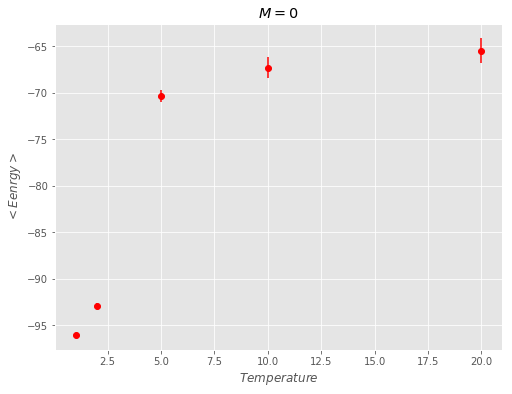

In [21]:
energy_twoM0_m, energy_twoM0_s = fig_energy_M0(51200, energy_two, 'Energy-Temperature_figure_M=0_Temp=1-20_deltaT=51200-102400.png')

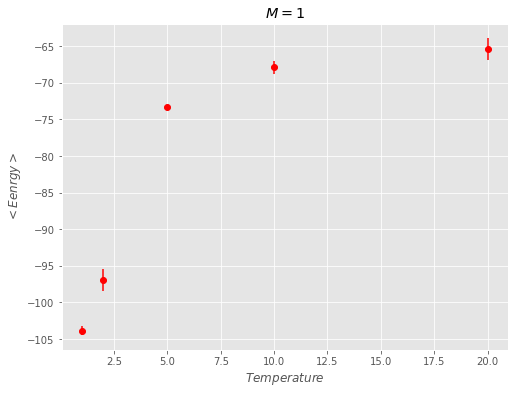

In [22]:
energy_twoM1_m, energy_twoM1_s = fig_energy_M1(51200, energy_two,  'Energy-Temperature_figure_M=1_Temp=1-20_deltaT=51200-102400.png')

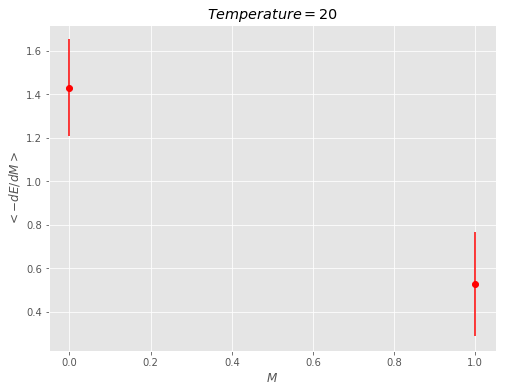

In [23]:
dlogp_two_m, dlogp_two_s = fig_dE(51200, dlogp_two, 'dEnergy-M_figure_Temp=20_Temp=1-20_deltaT=51200-102400.png')

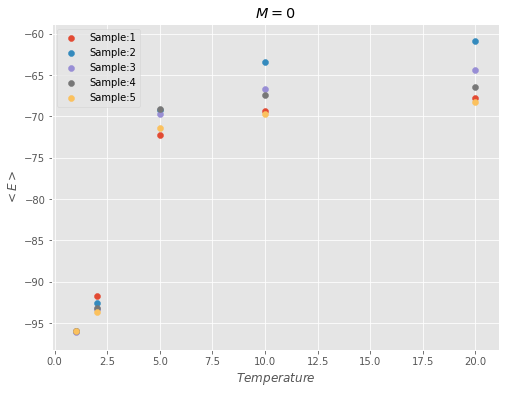

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
E_M0 = np.zeros([5, 5])
E_M1 = np.zeros([5, 5])
dE = np.zeros([5, 2])

write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

start = 51200
end = 2*start

for i in range(5):
    for j in range(5):
        E_M0[i, j] = energy_two[i][j, start:end].mean()
        E_M1[i, j] = energy_two[i][9-j, start:end].mean()
    dE[i, 0] = dlogp_two[i][4, start:end].mean()
    dE[i, 1] = dlogp_two[i][5, start:end].mean()
    
    ax.scatter(Temp, E_M0[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig(write_file_pass+'Energy-Temperature_EverySample_figure_M=0_Temp=1-20_deltaT=51200-102400.png')

plt.show()

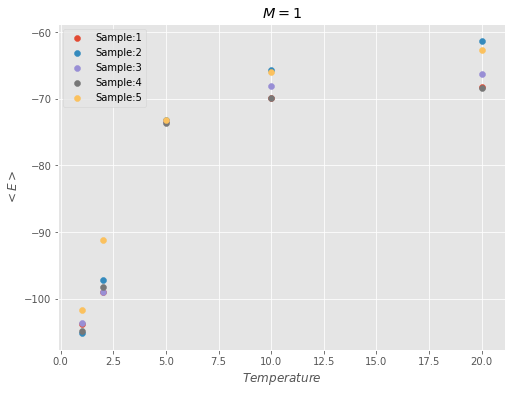

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(5):    
    ax.scatter(Temp, E_M1[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig(write_file_pass+'Energy-Temperature_EverySample_figure_M=1_Temp=1-20_deltaT=51200-102400.png')

plt.show()

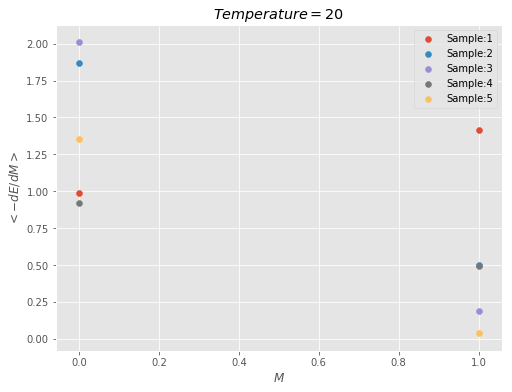

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(5):    
    ax.scatter(np.array([0]), dE[i, 0], color=cycle[i], label='Sample:{}'.format(i+1))
    ax.scatter(np.array([1]), dE[i, 1], color=cycle[i])

ax.set_title('$Temperature=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig(write_file_pass+'dEnergy-M_EverySample_figure_Temp=20_Temp=1-20_deltaT=51200-102400.png')

plt.show()

In [38]:
print(dE)

[[ 0.99097029  1.41652339]
 [ 1.86733864  0.49694407]
 [ 2.01457019  0.18855933]
 [ 0.92095995  0.49395873]
 [ 1.35544672  0.0381016 ]]


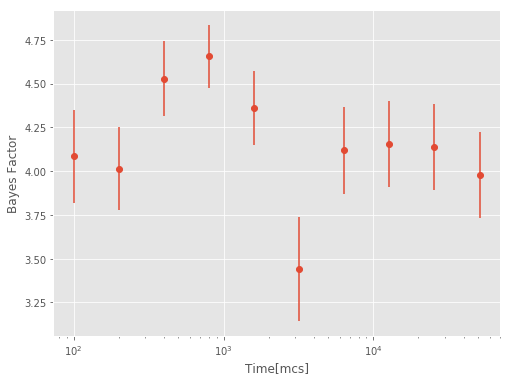

In [76]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    N = 50
    
    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0[x_M0[j], j]
            y_M1[i, j] = E_M1[x_M1[j], j]
        S_M0[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2 = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0])
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')

fn = write_file_pass + 'BayesFactor-Time_Temp=1-20_deltaT=51200-102400.png'
#plt.savefig(fn)

plt.show()

## 交換ありなし比較

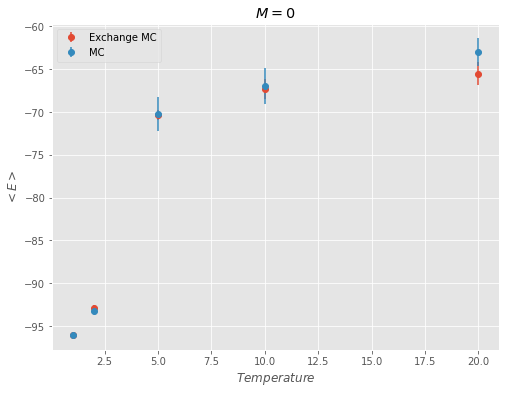

In [48]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.errorbar(Temp, energy_twoM0_m, yerr=energy_twoM0_s, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(Temp, energy_twoM0_m_n, yerr=energy_twoM0_s_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

fn = write_file_pass + 'Energy-Temperature_figure_koukan-AriNashiHikaku_M=0_Temp=1-20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

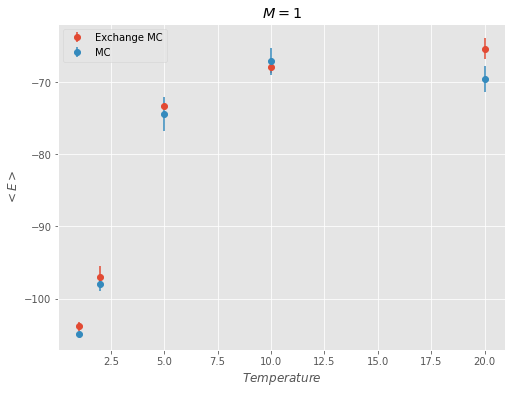

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.errorbar(Temp, energy_twoM1_m, yerr=energy_twoM1_s, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(Temp, energy_twoM1_m_n, yerr=energy_twoM1_s_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

fn = write_file_pass + 'Energy-Temperature_figure_koukan-AriNashiHikaku_M=1_Temp=1-20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

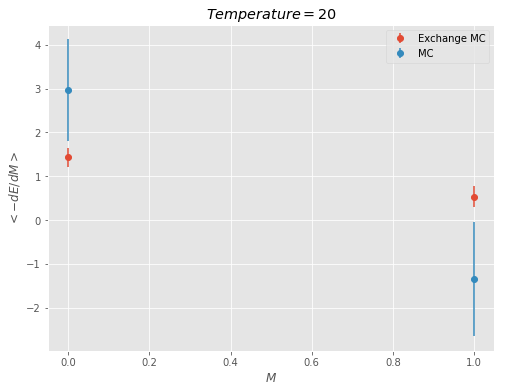

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.errorbar(np.array([0, 1]), dlogp_two_m, yerr=dlogp_two_s, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(np.array([0, 1]), dlogp_two_m_n, yerr=dlogp_two_s_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temperature=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = write_file_pass + 'dEnergy-M_figure_koukan-AriNashiHikaku_Temp=20_Temp=1-20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

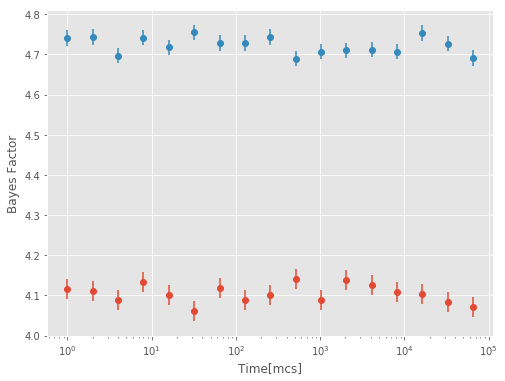

In [96]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 1
start = t_0
end = 2*start


while start<102400:
    
    N = 5000
    
    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0[x_M0[j], j]
            y_M1[i, j] = E_M1[x_M1[j], j]
        S_M0[i] = integrate.simps(y_M0[i], beta)#*((-1/Temp)**2), Temp)
        S_M1[i] = integrate.simps(y_M1[i], beta)#*((-1/Temp)**2), Temp)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2 = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0])

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0_n[x_M0[j], j]
            y_M1[i, j] = E_M1_n[x_M1[j], j]
        S_M0[i] = integrate.simps(y_M0[i], beta)#*((-1/Temp)**2), Temp)
        S_M1[i] = integrate.simps(y_M1[i], beta)#*((-1/Temp)**2), Temp)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE_n[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2_n = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF_n = BF_path2_n.mean()
    sig_BF_n = 0.

    for i in range(N):
        sig_BF_n += (BF_path2_n[i]-bar_BF_n)**2
    sig_BF_n /= (BF_path2_n.shape[0]-1)
    sig_BF_n = np.sqrt(sig_BF_n)
    sig_BF_n /= np.sqrt(BF_path2_n.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF_n, sig_BF_n, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_BF_n, sig_BF_n, fmt='o', color=cycle[1])        
  
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()

fn = write_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1-20_deltaT=51200-102400.png'
#plt.savefig(fn)

plt.show()

## 3/12

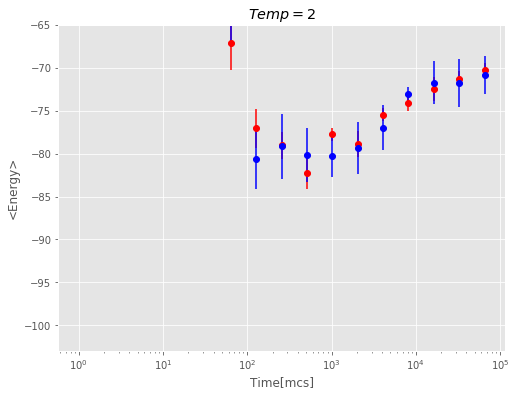

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 1
start = t_0
end = 2*start

M_value = 2

while start<102400:
    
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_two[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red', label='Exchange MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red')
        
        
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_two_n[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue', label='MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue')
    
#     dE = np.zeros([5, 11])
#     for i in range(5):
#         for j in range(11):
#             dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
#     y = np.zeros([N, 11])
#     S = np.zeros(N)
#     for i in range(N):
#         x = np.random.randint(0, 5, 11)
#         for j in range(11):
#             y[i, j] = dE[x[j], j]
#         S[i] = integrate.simps(y[i], model)/1.
        
#     bar_S = S.mean()
#     sig_S = 0.
#     for i in range(N):
#         sig_S += (S[i]-bar_S)**2
#     sig_S /= (S.shape[0]-1)
#     sig_S = np.sqrt(sig_S)
#     sig_S /= np.sqrt(S.shape[0])
    
#     if start==100:
#         ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
#     else:
#         ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
ax.set_title('$Temp=2$')
plt.legend()
ax.set_ylim(-103, -65)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

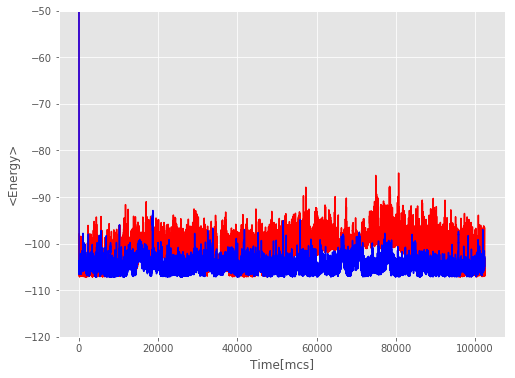

In [137]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
jikan = np.arange(0, 102400)

ax.plot(jikan, energy_two[4][9, ], color='red')
ax.plot(jikan, energy_two_n[4][9, :102400], color='blue')

#ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
plt.legend()
ax.set_ylim(-120, -50)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

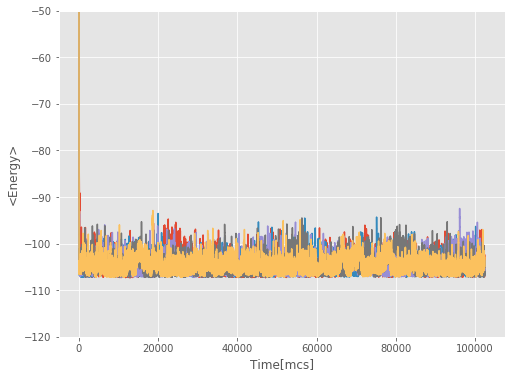

In [135]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
jikan = np.arange(0, 102400)

for i in range(5):
#    ax.plot(jikan, energy_two[i][9, ])
    ax.plot(jikan, energy_two_n[i][9, :102400])

#ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
plt.legend()
ax.set_ylim(-120, -50)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

## 3/14

In [5]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

In [6]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=1-20_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp_two[i],\
    pick_two[i], update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

Wall time: 45.9 s


In [9]:
de0_two_2 = ['zero', 'one', 'two', 'three', 'four']
de1_two_2 = ['zero', 'one', 'two', 'three', 'four']
ka_two_2 = ['zero', 'one', 'two', 'three', 'four']
kd_two_2 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_2 = ['zero', 'one', 'two', 'three', 'four']
energy_two_2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_2 = ['zero', 'one', 'two', 'three', 'four']
pick_two_2 = ['zero', 'one', 'two', 'three', 'four']
update_two_2 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_2 = ['zero', 'one', 'two', 'three', 'four']

In [10]:
%%time

Temp2 = np.array([3, 4, 6, 7, 8, 9])

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=3.0-9.0_replica=6_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_2[i], de1_two_2[i], ka_two_2[i], kd_two_2[i], sigma_two_2[i], energy_two_2[i], dlogp_two_2[i],\
    pick_two_2[i], update_two_2[i], exchange_two_2[i] = file_output_two(r_file, time, np.hstack((Temp2, Temp2)))

Wall time: 48.7 s


In [15]:
print(energy_two_2[0].shape)
print(energy_two_2[0][11, 102390:])

(12, 102400)
[-103.1115878   -93.72025258 -103.07970266  -93.71820373 -103.07970266
 -103.07970266  -93.8142051  -103.07970266 -103.07970266 -103.07970266]


[-96.01299165 -92.94037733 -70.34817065 -67.32454606 -65.52040043]


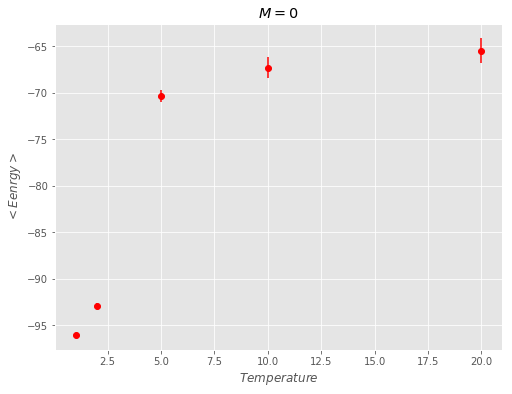

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 51200
end = 2*start
element = 5

energy_m = np.zeros(element, dtype=float)
energy_s = np.zeros(element, dtype=float)

for i in range(element):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()

    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
print(energy_m)


ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')



plt.show()

[-78.77422795 -73.21946815 -70.24334258 -69.49298094 -68.96804595
 -68.56948323]


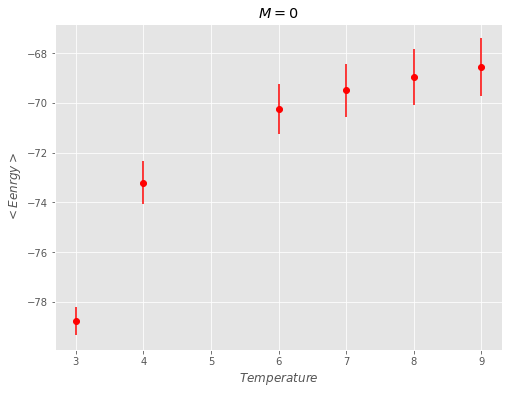

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 51200
end = 2*start
element = 6

energy_m2 = np.zeros(element, dtype=float)
energy_s2 = np.zeros(element, dtype=float)

for i in range(element):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_2[j][i][start:end].mean()
    energy_m2[i] = bar_A_i.mean()

    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m2[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s2[i] = sig
    
print(energy_m2)


ax.errorbar(np.array([3, 4, 6, 7, 8, 9]), energy_m2, yerr=energy_s2, fmt='o', color='red')
ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')



plt.show()

In [19]:
energy_m_path2_M0 = np.zeros(11)
energy_s_path2_M0 = np.zeros(11)

energy_m_path2_M0[0] = energy_m[0]
energy_m_path2_M0[1] = energy_m[1]
energy_m_path2_M0[2] = energy_m2[0]
energy_m_path2_M0[3] = energy_m2[1]
energy_m_path2_M0[4] = energy_m[2]
energy_m_path2_M0[5] = energy_m2[2]
energy_m_path2_M0[6] = energy_m2[3]
energy_m_path2_M0[7] = energy_m2[4]
energy_m_path2_M0[8] = energy_m2[5]
energy_m_path2_M0[9] = energy_m[3]
energy_m_path2_M0[10] = energy_m[4]

energy_s_path2_M0[0] = energy_s[0]
energy_s_path2_M0[1] = energy_s[1]
energy_s_path2_M0[2] = energy_s2[0]
energy_s_path2_M0[3] = energy_s2[1]
energy_s_path2_M0[4] = energy_s[2]
energy_s_path2_M0[5] = energy_s2[2]
energy_s_path2_M0[6] = energy_s2[3]
energy_s_path2_M0[7] = energy_s2[4]
energy_s_path2_M0[8] = energy_s2[5]
energy_s_path2_M0[9] = energy_s[3]
energy_s_path2_M0[10] = energy_s[4]

print(energy_m_path2_M0)

[-96.01299165 -92.94037733 -78.77422795 -73.21946815 -70.34817065
 -70.24334258 -69.49298094 -68.96804595 -68.56948323 -67.32454606
 -65.52040043]


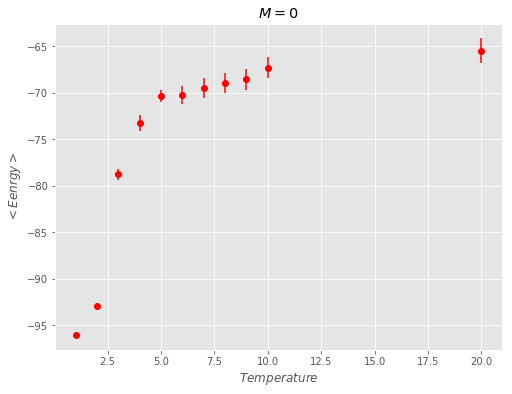

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]), energy_m_path2_M0, yerr=energy_s_path2_M0, fmt='o', color='red')
ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.show()

[-103.84104682  -96.95292644  -73.34600069  -67.88321407  -65.4046054 ]


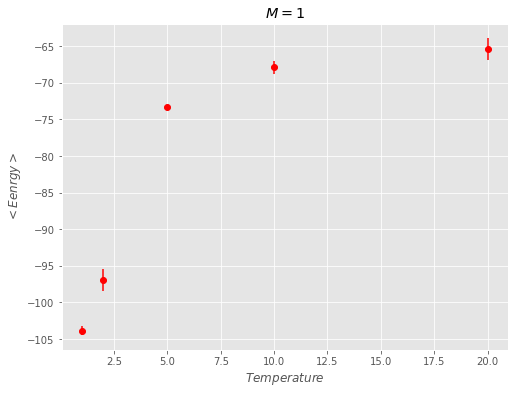

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 51200
end = 2*start
element = 5

energy_m = np.zeros(element, dtype=float)
energy_s = np.zeros(element, dtype=float)

for i in range(element):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][9-i][start:end].mean()
    energy_m[i] = bar_A_i.mean()

    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
print(energy_m)


ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')



plt.show()

[-92.10125605 -80.26094264 -72.29374714 -70.90803004 -70.02602217
 -69.38105538]


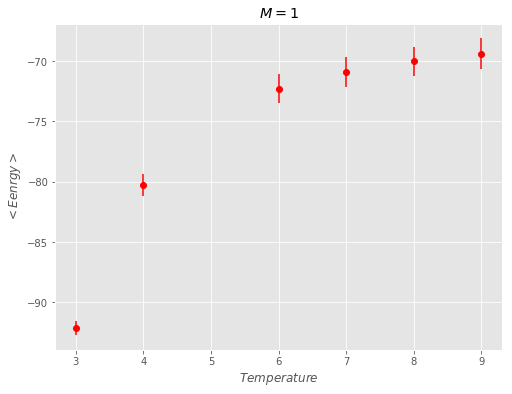

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 51200
end = 2*start
element = 6

energy_m2 = np.zeros(element, dtype=float)
energy_s2 = np.zeros(element, dtype=float)

for i in range(element):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_2[j][11-i][start:end].mean()
    energy_m2[i] = bar_A_i.mean()

    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m2[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s2[i] = sig
    
print(energy_m2)

ax.errorbar(np.array([3, 4, 6, 7, 8, 9]), energy_m2, yerr=energy_s2, fmt='o', color='red')
ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.show()

In [25]:
energy_m_path2_M1 = np.zeros(11)
energy_s_path2_M1 = np.zeros(11)

energy_m_path2_M1[0] = energy_m[0]
energy_m_path2_M1[1] = energy_m[1]
energy_m_path2_M1[2] = energy_m2[0]
energy_m_path2_M1[3] = energy_m2[1]
energy_m_path2_M1[4] = energy_m[2]
energy_m_path2_M1[5] = energy_m2[2]
energy_m_path2_M1[6] = energy_m2[3]
energy_m_path2_M1[7] = energy_m2[4]
energy_m_path2_M1[8] = energy_m2[5]
energy_m_path2_M1[9] = energy_m[3]
energy_m_path2_M1[10] = energy_m[4]

energy_s_path2_M1[0] = energy_s[0]
energy_s_path2_M1[1] = energy_s[1]
energy_s_path2_M1[2] = energy_s2[0]
energy_s_path2_M1[3] = energy_s2[1]
energy_s_path2_M1[4] = energy_s[2]
energy_s_path2_M1[5] = energy_s2[2]
energy_s_path2_M1[6] = energy_s2[3]
energy_s_path2_M1[7] = energy_s2[4]
energy_s_path2_M1[8] = energy_s2[5]
energy_s_path2_M1[9] = energy_s[3]
energy_s_path2_M1[10] = energy_s[4]

print(energy_m_path2_M1)

[-103.84104682  -96.95292644  -92.10125605  -80.26094264  -73.34600069
  -72.29374714  -70.90803004  -70.02602217  -69.38105538  -67.88321407
  -65.4046054 ]


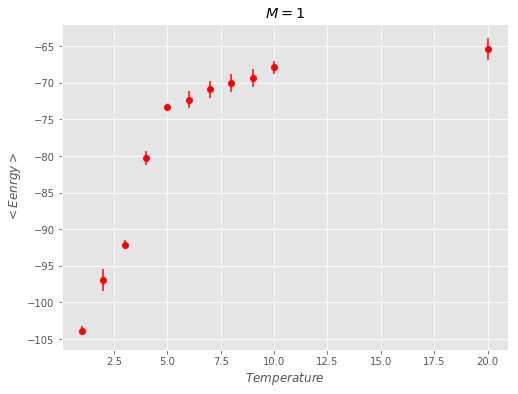

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]), energy_m_path2_M1, yerr=energy_s_path2_M1, fmt='o', color='red')
ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.show()

In [31]:
Temp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
beta = 1/Temp

S_M1 = integrate.simps(energy_m_path2_M1*(-1/Temp**2), Temp)
S_M0 = integrate.simps(energy_m_path2_M0*(-1/Temp**2), Temp)

S_M1 = integrate.simps(energy_m_path2_M1, beta)
S_M0 = integrate.simps(energy_m_path2_M0, beta)

print(S_M1, S_M0, S_M1-S_M0)

87.8962903421 84.2695740566 3.62671628545


## 3/15

In [4]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
time_n = 204800
Temp = np.array([1, 2, 5, 10, 20], dtype=float)
beta = 1/Temp
print(beta)
print(beta[-1])
print(beta[::-1])
model = np.array([0, 1])
print(model)

[ 1.    0.5   0.2   0.1   0.05]
0.05
[ 0.05  0.1   0.2   0.5   1.  ]
[0 1]


In [5]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

In [6]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=1-20_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp_two[i],\
    pick_two[i], update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

Wall time: 2min 30s


In [7]:
de0_two_2 = ['zero', 'one', 'two', 'three', 'four']
de1_two_2 = ['zero', 'one', 'two', 'three', 'four']
ka_two_2 = ['zero', 'one', 'two', 'three', 'four']
kd_two_2 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_2 = ['zero', 'one', 'two', 'three', 'four']
energy_two_2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_2 = ['zero', 'one', 'two', 'three', 'four']
pick_two_2 = ['zero', 'one', 'two', 'three', 'four']
update_two_2 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_2 = ['zero', 'one', 'two', 'three', 'four']

In [8]:
%%time

read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\syusei\\'

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=1.0-20.0_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_2[i], de1_two_2[i], ka_two_2[i], kd_two_2[i], sigma_two_2[i], energy_two_2[i], dlogp_two_2[i],\
    pick_two_2[i], update_two_2[i], exchange_two_2[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

Wall time: 2min 21s


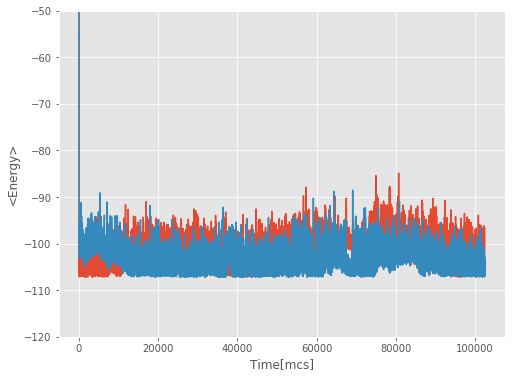

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
jikan = np.arange(0, 102400)

ax.plot(jikan, energy_two[4][9, ])
ax.plot(jikan, energy_two_2[4][9, ])

#ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
plt.legend()
ax.set_ylim(-120, -50)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

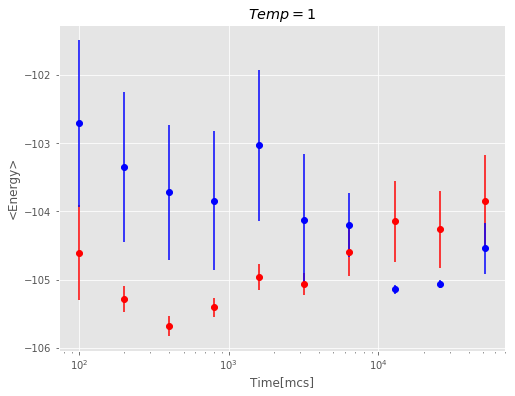

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

M_value = 9

while start<102400:
    
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_two[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red')#, label='Exchange MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red')
        
        
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_two_2[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue')#, label='MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue')
        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
ax.set_title('$Temp=1$')
plt.legend()
#ax.set_ylim(-103, -65)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

In [15]:
print(energy_two_2[0][9, 102390:])

[-100.24608646  -99.99112949  -99.99112949  -97.64958691  -97.64958691
  -98.38255299  -98.38255299  -98.38255299  -98.38255299  -97.17021318]


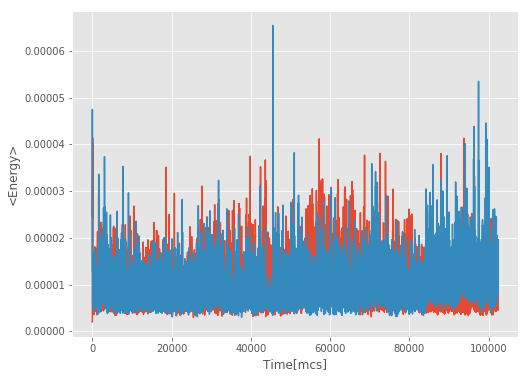

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
jikan = np.arange(0, 102400)

ax.plot(jikan, sigma_two[0][9, ])
ax.plot(jikan, sigma_two_2[0][9, ])

#ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
plt.legend()
#ax.set_ylim(-120, -50)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

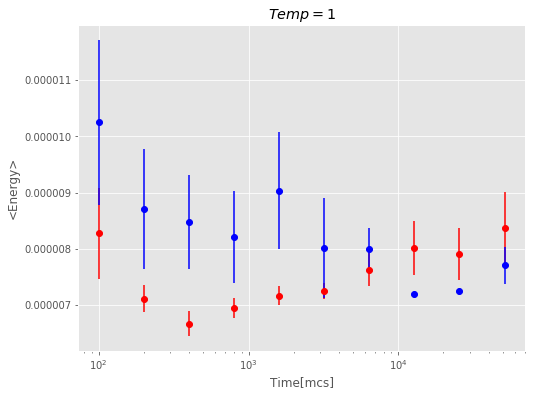

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

M_value = 9

while start<102400:
    
    Sigma_one = np.zeros(5)
    for i in range(5):
        Sigma_one[i] = sigma_two[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Sigma_one = Sigma_one.mean()
    
    sig_Sigma_one = 0
    for i in range(5):
        sig_Sigma_one += (Sigma_one[i]-bar_Sigma_one)**2
    sig_Sigma_one /= (Sigma_one.shape[0]-1)
    sig_Sigma_one = np.sqrt(sig_Sigma_one)
    sig_Sigma_one /= np.sqrt(Sigma_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Sigma_one, sig_Sigma_one, fmt='o', color='red')#, label='Exchange MC')
    else:
        ax.errorbar(start, bar_Sigma_one, sig_Sigma_one, fmt='o', color='red')
        
        
    Sigma_one = np.zeros(5)
    for i in range(5):
        Sigma_one[i] = sigma_two_2[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Sigma_one = Sigma_one.mean()
    
    sig_Sigma_one = 0
    for i in range(5):
        sig_Sigma_one += (Sigma_one[i]-bar_Sigma_one)**2
    sig_Sigma_one /= (Sigma_one.shape[0]-1)
    sig_Sigma_one = np.sqrt(sig_Sigma_one)
    sig_Sigma_one /= np.sqrt(Sigma_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Sigma_one, sig_Sigma_one, fmt='o', color='blue')#, label='MC')
    else:
        ax.errorbar(start, bar_Sigma_one, sig_Sigma_one, fmt='o', color='blue')
        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
ax.set_title('$Temp=1$')
plt.legend()
#ax.set_ylim(-103, -65)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()